In [1]:
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import pdb
import time
import calendar
import pyfftw
from tqdm.notebook import tqdm
from comb_utils import *

In [2]:
def transfer_mask(A,B):
    # A modes to B modes
    '''For each B mode, find one A mode that is closest in frequency to the specified B mode'''
    ωA = A.ωarr_adjusted
    ωB = B.ωarr_adjusted
    Aidx = 0
    mask = []
    for ωb in ωB:
        currDiff = np.abs(ωA[Aidx]-ωb)
        while np.abs(ωA[Aidx]-ωb)<=currDiff:
            currDiff = np.abs(ωA[Aidx]-ωb)
            Aidx += 1 
            if Aidx == len(ωA):
                break
        Aidx -= 1
        mask.append(Aidx)
    return np.array(mask)

ω_start = 193.4160363481703 THz, ω_end = 193.41062074247742 THz
λ_start = 1549.9876000991992 nm, λ_end = 1550.0310006200125 nm
normalized detunings = [ -8 , 20 ] (relevant parameters: δnorm_range)
sweep speed (ω space) = 5415605.69290625 GHz/s 
sweep speed (λ space) = 43400.52081312755 nm/s
real time = 1e-06, normalized time = 193.41448903225805 (relevant parameters: total_time), dt = 0.001
Simulation points = 12894299.0 (relevant parameters: dt)
detuning at start = -1.54731591225 GHz, detuning at end = 3.86828978065625 GHz (relevant parametes: ω_range, λ_range)
Dint is a polynomial of order 9.
g0 = 1.0199359714377958, Veff = 3.6128315516282617e-16, F^2 = 42.548069586909854


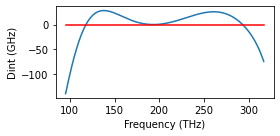

ω_start = 150.0630991572229 THz, ω_end = 150.05889742406038 THz
λ_start = 1997.7760001204815 nm, λ_end = 1997.8319389672617 nm
normalized detunings = [ -8 , 20 ] (relevant parameters: δnorm_range)
sweep speed (ω space) = 4201733.16253125 GHz/s 
sweep speed (λ space) = 55938.84678037003 nm/s
real time = 1e-06, normalized time = 150.0618986620336 (relevant parameters: total_time), dt = 0.001
Simulation points = 10004126.0 (relevant parameters: dt)
detuning at start = -1.20049518928125 GHz, detuning at end = 3.00123797325 GHz (relevant parametes: ω_range, λ_range)
g0 = 0.3151995548999483, Veff = 7.037167544041137e-16, F^2 = 28.154527974344838


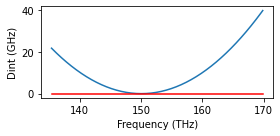

In [30]:
A = microring(R=25e-6,height=1e-6,width=2.3e-6,ng=2.2,Qc=1e6,Qi=1e6,n2=2.4e-19,
                δnorm_range=[-8,20],ω_range=[],λ_range=[],ω0=299792458/1.550e-6,λ0=None,
                total_time=1e-6,ω_sweep_speed=None,λ_sweep_speed=None,Qc_import=[],Dint_file='2.300w_58.5r_0.960h.csv',dt=1e-3,
                Nmodes=2**8,pump=200e-3,snapshots=2000,mode_offset=15,Dint_degrees=9)

D2 = 15e6 # Hz

numModes = 2**7
mode_offset = 10
mu = np.arange(-numModes/2+mode_offset,numModes/2+mode_offset)
Dint = mu**2*D2/2

B = microring(R=80e-6,height=1e-6,width=1.4e-6,ng=2.2,Qc=1e6,Qi=1e6,n2=2.4e-19,
                δnorm_range=[-8,20],ω_range=[],λ_range=[],ω0=A.ωarr_adjusted[63],λ0=None,
                total_time=1e-6,ω_sweep_speed=None,λ_sweep_speed=None,Qc_import=[],Dint_file=None,dt=1e-3,
                Nmodes=numModes,pump=200e-3,snapshots=2000,mode_offset=10,Dint_degrees=9,set_Dint=Dint)

# B.Dint_arr = B.ifftshift(Dint,numModes//2)
# B.plot_Dint()
# plt.plot(B.ifftshift(Dint,numModes//2))

In [31]:
A.ωarr_adjusted[63]

150061898662033.62

In [32]:
mask_AatB = transfer_mask(A,B) # A modes to use as pump terms for B equation
mask_BatA = transfer_mask(B,A) # B modes to use as pump terms for A equation

In [33]:
mask_BatA # we can start with the most general case where we include all pumps, if it's too computationally heavy then we can remove this.

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   3,   6,   9,  12,  16,
        19,  22,  25,  28,  32,  35,  38,  41,  44,  48,  51,  54,  57,
        60,  64,  67,  70,  73,  76,  80,  83,  86,  89,  92,  96,  99,
       102, 105, 108, 111, 115, 118, 121, 124, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 12

In [34]:
len(mask_BatA) # Nummodes//2 = pump location

256

In [35]:
mask_AatB[128//2]

66

In [36]:
ΔA = A.ωarr_adjusted-B.ωarr_adjusted[mask_BatA]

In [40]:
ΔA[63]

0.0

In [41]:
ΔB = B.ωarr_adjusted-A.ωarr_adjusted[mask_AatB]

In [44]:
ΔB[B.Nmodes//2-mode_offset]

0.0

In [45]:
B.fftshift(ΔB,B.idx)[0]

0.0

In [49]:
ΦA = A.Dint_arr + A.fftshift(ΔA,A.idx)

In [47]:
np.linspace(0,0,10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
ΦB = B.Dint_arr + B.fftshift(ΔB,B.idx)

In [56]:
B.Δωtot/1e6

300.12379732406725

In [63]:
ΔB[np.abs(ΔB)<(5*B.Δωtot)]

array([-8.42971262e+08,  0.00000000e+00])

In [62]:
np.where(np.abs(ΔB)<(5*B.Δωtot))

(array([38, 54]),)

In [64]:
mask = np.abs(ΔB)<(5*B.Δωtot)

In [73]:
ΔB*mask+1-1

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -8.42971262e+08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [80]:
ΔB[mask]

array([-8.42971262e+08,  0.00000000e+00])